<a href="https://colab.research.google.com/github/rajy4683/EIP4_Phase1_Final/blob/master/Assignment5_lossPlotter_wrn_acc_sth_rkg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#from urllib2 import Request, urlopen
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# mount gdrive and unzip data

from tabulate import tabulate
import re
import glob
import os
pd.options.display.max_columns = 6

In [0]:
file_name='/content/gdrive/My Drive/json_wrn2_widrn_acc_run2_sth_1577258285.json'
#'/content/gdrive/My Drive/json_simplecnn_rekog_1577176651.json'
df = pd.read_json(file_name)


In [0]:
df.columns

In [0]:
def plot_graphs(df, index_range, column_to_plot):
    fig, ax = plt.subplots(figsize=(15, 6))
    for counter_name in column_to_plot:
        #ax.plot(df[time_index].values,df[counter_name].values)
        #index_range= df[time_index].values
        if(index_range is None):
            index_range=np.arange(0,df.shape[0],1)
        ax.plot(index_range,df[counter_name].values)
    ax.set(xlabel="Date", ylabel="Loss/Accuracy")
    ax.legend(column_to_plot)

In [0]:
from tabulate import tabulate
def show_table(df_to_show,acc_loss):
  pattern_str ="^val.*"+acc_loss+"$|val_loss"
  prog_acc = re.compile(pattern_str)
  val_loss = [column_name for column_name in df_to_show.columns if prog_acc.match(column_name) != None]
  #print(val_loss)
  #print(df_to_show[val_loss])
  print(tabulate(df_to_show[val_loss],headers=val_loss))


In [0]:
def plot_moving_average(df_to_show,acc_loss,periods=10):
  #plt.plot(figsize=(15, 6))
  pattern_str ="^val.*"+acc_loss
  prog = re.compile(pattern_str)
  val = [column_name for column_name in df_to_show.columns if prog.match(column_name) != None]
  df_to_show[val].rolling(window=5).mean().plot(figsize=(15, 6))

In [0]:
def plot_lr_val_loss(df_to_plot):
    fig, ax = plt.subplots(2,figsize=(15, 6))
    ax[0].plot(df_to_plot.index.values,df_to_plot['lr'].values,label='lr')
    ax[0].set_ylim(df_to_plot['lr'].min(), df_to_plot['lr'].max())
    ax[0].legend()
    ax[1].plot(df_to_plot.index.values,df_to_plot['val_loss'].values,'-o',color='purple',label='val_loss')
    ax[1].set_ylim(df_to_plot['val_loss'].min(), df_to_plot['val_loss'].max())
    ax[1].legend()

In [0]:
def plot_all_loss_accuracy(df):
    plot_graphs(df, np.arange(0,df.shape[0],1), ['lr'])
    prog = re.compile("^val.*acc$|^val.*accuracy$")
    val_acc = [column_name for column_name in df.columns if prog.match(column_name) != None]
    plot_graphs(df, np.arange(0,df.shape[0],1), val_acc)
    prog = re.compile("^val.*output_loss$")
    val_loss = [column_name for column_name in df.columns if prog.match(column_name) != None]
    #print(val_loss)
    plot_graphs(df, np.arange(0,df.shape[0],1), val_loss)
    total_loss = ['loss','val_loss']
    plot_graphs(df, np.arange(0,df.shape[0],1), total_loss)
    plot_lr_val_loss(df)

In [0]:
plot_all_loss_accuracy(df)

In [9]:
import re
prog = re.compile("^val.*acc$")
val_acc_1 = [column_name for column_name in df.columns if prog.match(column_name) != None]
val_acc_1

['val_gender_output_weighted_acc',
 'val_image_quality_output_weighted_acc',
 'val_age_output_weighted_acc',
 'val_weight_output_weighted_acc',
 'val_bag_output_weighted_acc',
 'val_pose_output_weighted_acc',
 'val_footwear_output_weighted_acc',
 'val_emotion_output_weighted_acc']

In [0]:
prog_acc = re.compile("^val.*acc$")
val_acc = [column_name for column_name in df.columns if prog_acc.match(column_name) != None]
prog_loss = re.compile("^val.*loss$")
val_loss = [column_name for column_name in df.columns if prog_loss.match(column_name) != None]

In [0]:
def plot_from_df(df_local, plot_graphs=False):
    min_val_loss_idx = df_local['val_loss'].idxmin()
    print("#####################################")
    print("Epochs:",df_local['val_loss'].shape[0]-1,"Min val_loss:",np.round(df_local['val_loss'].min(),6))
    prog_acc = re.compile("^val.*acc$|^val.*accuracy$")
    val_acc = [column_name for column_name in df_local.columns if prog_acc.match(column_name) != None]
    prog_loss = re.compile("^val.*loss$")
    val_loss = [column_name for column_name in df_local.columns if prog_loss.match(column_name) != None]
    print("#####################################")
    print("Current loss and val loss")
    print("#####################################")
    print(df_local[['loss','val_loss']].tail(1))
    print(tabulate(df_local.nsmallest(5,'val_loss')[val_acc],headers=val_acc))
    print(tabulate(df_local.nsmallest(5,'val_loss')[val_loss],headers=val_loss))
    print("#####################################")
    print(df_local.loc[min_val_loss_idx][val_acc])
    print(df_local.loc[min_val_loss_idx][val_loss])
    if (plot_graphs == True):
        plot_all_loss_accuracy(df_local)
    return df_local

In [0]:
def describe_min_val_loss(df_plot):
    prog_acc= re.compile("^val.*acc$|val_loss")
    val_acc = np.array([column_name for column_name in df_plot.columns if prog_acc.match(column_name) != None])
    print(tabulate(df_plot.describe()[val_acc], headers=val_acc))
    min_idx_val = df_plot['val_loss'].idxmin()
    print(tabulate(df_plot.iloc[min_idx_val:min_idx_val+1][val_acc],headers=val_acc))


In [0]:
def delta_between_two_dfs(df_frame1, df_frame2):
    df_plot = df_frame1
    min_idx_val = df_plot['val_loss'].idxmin()
    prog_acc= re.compile("^val.*acc$|val_loss")
    val_acc = np.array([column_name for column_name in df_plot.columns if prog_acc.match(column_name) != None])
    arr1 = df_plot.iloc[min_idx_val:min_idx_val+1][val_acc].T

    df_plot_2 = df_frame2
    min_idx_val_2 = df_plot_2['val_loss'].idxmin()
    prog_acc= re.compile("^val.*acc$|val_loss")
    val_acc = np.array([column_name for column_name in df_plot_2.columns if prog_acc.match(column_name) != None])
    arr2 = df_plot_2.iloc[min_idx_val_2:min_idx_val_2+1][val_acc].T
    final_val=np.round((arr1.iloc[1:,:1].values-arr2.iloc[1:,:1].values),4)
    final_val=final_val.reshape(final_val.shape[0],)
    print(final_val)
    return final_val

In [0]:
def plot_multiple_files(filenames_to_parse, plot_graphs=False):
    df_array = []
    for file_name_value in filenames_to_parse:
        df_local = pd.read_json(file_name_value)
        df_array.append(plot_from_df(df_local,plot_graphs=plot_graphs))
    return df_array

In [0]:
plot_multiple_files(files_list[3:])

In [0]:
def get_latestn_files(path = "/content/gdrive/My Drive/WRN_Extend/", pattern="*.json",count=2):
    #path = "/content/gdrive/My Drive/WRN_Extend/"
    file_path = os.path.join(path)+pattern
    files = [f for f in glob.iglob(file_path, recursive=False)]
    latest_file = sorted(files, key=os.path.getctime,reverse=True)
    return latest_file[:count]
#files = os.listdir(path)
#filenamere.split(r'/',files[len(files)-1])

In [58]:
get_latestn_files(path = "/content/gdrive/My Drive/WRN_Extend/",pattern="*back*",count=1)
get_latestn_files(path = "/content/gdrive/My Drive/WRN_Extend/",pattern="*json",count=1)

'/content/gdrive/My Drive/WRN_Extend/json_wrn2_rkg_fresh_wrn_wide_rjy2_1577594233.json'

In [37]:
path = "/content/gdrive/My Drive/WRN_Extend"
files = [f for f in glob.glob(path + "**/*.json", recursive=False)]
latest_file = max(files, key=os.path.getctime)
latest_file

'/content/gdrive/My Drive/WRN_Extend/json_wrn2_rkg_fresh_wrn_wide_rjy2_1577594233.json'

In [0]:
files_list = [path+file_name for file_name in files if re.match("^json.*json", file_name) != None]

In [0]:
files_list

['/content/gdrive/My Drive/WRN2_LongRun/json_wrn2_widrn_acc_run2_sth_rkg_1577280556_round1.json',
 '/content/gdrive/My Drive/WRN2_LongRun/json_wrn2_widrn_acc_run2_sth_rkg_1577280556_round2.json',
 '/content/gdrive/My Drive/WRN2_LongRun/json_wrn2_widrn_acc_run2_sth_rkg_1577280556_round3.json',
 '/content/gdrive/My Drive/WRN2_LongRun/json_wrn2_widrn_acc_run2_sth_rkg_1577280556_round4.json']

In [0]:
df_full = pd.DataFrame()
for single_file in files_list:
  df_local = pd.read_json(single_file)
  #print(tabulate(df_local.head()))
  df_full=pd.concat([df_full,df_local],ignore_index=True)
df_full

,val_loss,val_gender_output_loss,val_image_quality_output_loss,...,footwear_output_weighted_acc,emotion_output_weighted_acc,lr
0,153.101391,0.574971,0.956121,...,0.621949,0.712326,0.000399
1,153.154101,0.580339,0.962072,...,0.621569,0.713585,0.000373
2,152.533867,0.582867,0.964389,...,0.622749,0.712326,0.000348
3,151.433958,0.567015,0.950655,...,0.622604,0.712504,0.000323
4,154.295328,0.580644,0.969409,...,0.625017,0.712587,0.000298
...,...,...,...,...,...,...,...
147,38.433751,0.439100,0.993867,...,0.679881,0.741139,0.001761
148,39.289790,0.493099,0.996573,...,0.686786,0.740883,0.001736
149,37.708232,0.454741,0.928346,...,0.680633,0.747452,0.001711
150,38.042907,0.444139,0.976239,...,0.685385,0.755923,0.001685


In [0]:
df_full.to_csv('/content/gdrive/My Drive/WRN2_LongRun/200_epoch_wrn2.csv', index=False)

In [0]:
df_full.iloc[50:52]

,val_loss,val_gender_output_loss,val_image_quality_output_loss,...,footwear_output_weighted_acc,emotion_output_weighted_acc,lr
52,33.259689,0.689699,0.998956,...,0.445724,0.713155,0.000189
53,32.882381,0.691303,0.986027,...,0.484511,0.712847,0.002097


In [0]:
plot_from_df(df_full)


In [0]:
df_array = plot_multiple_files(plotter_files)

In [0]:
def 

In [0]:
def plot_latest_from_path(path):
    filenames_to_parse = get_latestn_files(path = path,pattern="*backup",count=2)
                        # [
                        #   get_latestn_files(path = path,pattern="*json",count=1)[0],
                        #   get_latestn_files(path = path,pattern="*back*",count=1)[0]                          
                        # ]
    print(filenames_to_parse)
    return plot_multiple_files(filenames_to_parse)

In [0]:
df_array = plot_latest_from_path("/content/gdrive/My Drive/WRN_Base/")

In [0]:
get_latestn_files(path = path,pattern="*backup",count=2)

In [89]:
get_latestn_files(path = '/content/gdrive/My Drive/WRN_Extend/',pattern="*backup",count=1)[0]

'/content/gdrive/My Drive/WRN_Extend/json_wrn2_rkg_fresh_wrn_wide_rjy2_1577594233.json1577602245_backup'

In [35]:
get_latestn_files(path = '/content/gdrive/My Drive/WRN_Base/',pattern="*backup",count=3)

['/content/gdrive/My Drive/WRN_Base/json_wrn2_rkg_fresh_wrn_rjy2_1577595402.json1577603395_backup',
 '/content/gdrive/My Drive/WRN_Base/json_wrn2_rkg_fresh_wrn_rjy2_1577595402.json1577599252_backup',
 '/content/gdrive/My Drive/WRN_Base/json_wrn2_rkg_fresh_wrn_rjy2_1577595402.json1577599222_backup']

In [75]:
get_latestn_files(path = '/content/gdrive/My Drive/WRN_Base/',pattern="*json",count=1)[0]

'/content/gdrive/My Drive/WRN_Base/json_wrn2_rkg_fresh_wrn_rjy2_1577595402.json'

In [0]:
baseline_file_wide2='/content/gdrive/My Drive/WRN_Extend/json_wrn2_rkg_fresh_wrn_wide_rjy2_gml2_1577624977.json1577628048_backup'
baseline_file_wide='/content/gdrive/My Drive/WRN_Extend/json_wrn2_rkg_fresh_wrn_wide_rjy2_gml2_1577624977.json1577628048_backup'

In [81]:
get_latestn_files(path = '/content/gdrive/My Drive/WRN_Base/',pattern="*backup",count=3)

['/content/gdrive/My Drive/WRN_Base/json_wrn2_rkg_fresh_wrn_rjy2_gml2_1577624484.json1577627329_backup',
 '/content/gdrive/My Drive/WRN_Base/json_wrn2_rkg_fresh_wrn_rjy2_1577595402.json1577603395_backup',
 '/content/gdrive/My Drive/WRN_Base/json_wrn2_rkg_fresh_wrn_rjy2_1577595402.json1577599252_backup']

In [121]:
filenames_to_parse = [   
            #get_latestn_files(path = '/content/gdrive/My Drive/WRN_Wide2/',pattern="*json",count=1)[0],
            '/content/gdrive/My Drive/WRN_Wide2/json_wrn2_rkg_fresh_wrn_wide_rjy2_gml22_1577629016.json1577639769_backup',
            #'/content/gdrive/My Drive/WRN_Wide2/json_wrn2_rkg_fresh_wrn_wide_rjy2_gml22_1577629016.json1577634527_backup',
            #'/content/gdrive/My Drive/WRN_Wide2/json_wrn2_rkg_fresh_wrn_rjy2_gml2_1577624484.json1577627329_backup',
            #get_latestn_files(path = '/content/gdrive/My Drive/WRN_Base/',pattern="*backup",count=3)[2]
            baseline_file_wide2
            
]
print(filenames_to_parse)
df_array = plot_multiple_files(filenames_to_parse,plot_graphs=False)

['/content/gdrive/My Drive/WRN_Wide2/json_wrn2_rkg_fresh_wrn_wide_rjy2_gml22_1577629016.json1577639769_backup', '/content/gdrive/My Drive/WRN_Extend/json_wrn2_rkg_fresh_wrn_wide_rjy2_gml2_1577624977.json1577628048_backup']
#####################################
Epochs: 9 Min val_loss: 20.275822
#####################################
Current loss and val loss
#####################################
        loss   val_loss
9  19.522597  20.797816
      val_gender_output_acc    val_image_quality_output_acc    val_age_output_acc    val_weight_output_acc    val_bag_output_acc    val_pose_output_acc    val_footwear_output_acc    val_emotion_output_acc
--  -----------------------  ------------------------------  --------------------  -----------------------  --------------------  ---------------------  -------------------------  ------------------------
 7                 0.886811                        0.530512              0.438976                 0.620571              0.68061                0.

In [122]:
for pos in range(len(df_array)):
    describe_min_val_loss(df_array[pos])
#describe_min_val_loss(df_array[1])
out_arr=delta_between_two_dfs(df_array[0],df_array[1])
print(out_arr*100.0)
out_arr.sum()*100.0

         val_loss    val_gender_output_acc    val_image_quality_output_acc    val_age_output_acc    val_weight_output_acc    val_bag_output_acc    val_pose_output_acc    val_footwear_output_acc    val_emotion_output_acc
-----  ----------  -----------------------  ------------------------------  --------------------  -----------------------  --------------------  ---------------------  -------------------------  ------------------------
count   10                       10                             10                    10                       10                    10                      10                       10                         10
mean    21.0785                   0.868455                       0.50502               0.413681                 0.612795              0.666486                0.836909                 0.665256                   0.668553
std      0.819312                 0.017812                       0.0322432             0.0232433                0.0239937        

-2.87

In [119]:
filenames_to_parse = [   
            get_latestn_files(path = '/content/gdrive/My Drive/WRN_Extend/',pattern="*json",count=1)[0],
            #'/content/gdrive/My Drive/WRN_Extend/json_wrn2_rkg_fresh_wrn_wide_rjy2_gml2_1577624977.json1577635049_backup',
            #get_latestn_files(path = '/content/gdrive/My Drive/WRN_Extend/',pattern="*backup",count=1)[0]
            #'/content/gdrive/My Drive/WRN_Extend/json_wrn2_rkg_fresh_wrn_wide_rjy2_1577594233.json1577618037_backup'
            baseline_file_wide
]
print(filenames_to_parse)
df_array_wide = plot_multiple_files(filenames_to_parse,plot_graphs=False)

['/content/gdrive/My Drive/WRN_Extend/json_wrn2_rkg_fresh_wrn_wide_rjy2_gml2_1577624977.json', '/content/gdrive/My Drive/WRN_Extend/json_wrn2_rkg_fresh_wrn_wide_rjy2_gml2_1577624977.json1577628048_backup']
#####################################
Epochs: 5 Min val_loss: 13.754861
#####################################
Current loss and val loss
#####################################
        loss   val_loss
5  13.304895  13.754861
      val_gender_output_acc    val_image_quality_output_acc    val_age_output_acc    val_weight_output_acc    val_bag_output_acc    val_pose_output_acc    val_footwear_output_acc    val_emotion_output_acc
--  -----------------------  ------------------------------  --------------------  -----------------------  --------------------  ---------------------  -------------------------  ------------------------
 5                 0.862205                        0.537894              0.424213                 0.621063              0.666339               0.840059           

In [120]:
for pos in range(len(df_array_wide)):
    describe_min_val_loss(df_array_wide[pos])
#describe_min_val_loss(df_array[1])
out_arr=delta_between_two_dfs(df_array_wide[0],df_array_wide[1])
print(out_arr*100.0)
out_arr.sum()*100.0

         val_loss    val_gender_output_acc    val_image_quality_output_acc    val_age_output_acc    val_weight_output_acc    val_bag_output_acc    val_pose_output_acc    val_footwear_output_acc    val_emotion_output_acc
-----  ----------  -----------------------  ------------------------------  --------------------  -----------------------  --------------------  ---------------------  -------------------------  ------------------------
count    6                       6                               6                     6                        6                     6                      6                          6                         6
mean    14.4862                  0.874098                        0.489173              0.418717                 0.60269               0.648048               0.8344                     0.656988                  0.662648
std      0.617542                0.0138616                       0.0396472             0.0126023                0.0235803        

-7.62

In [30]:
get_latestn_files(path = '/content/gdrive/My Drive/WRN_Extend/',pattern="*h5",count=2)

['/content/gdrive/My Drive/WRN_Extend/assignment5_wrn2_rkg_fresh_wrn_wide_rjy2_gml2_1577624977_1577625577_model.008.h5',
 '/content/gdrive/My Drive/WRN_Extend/assignment5_wrn2_rkg_fresh_wrn_wide_rjy2_gml2_1577624977_1577625577_model.002.h5']

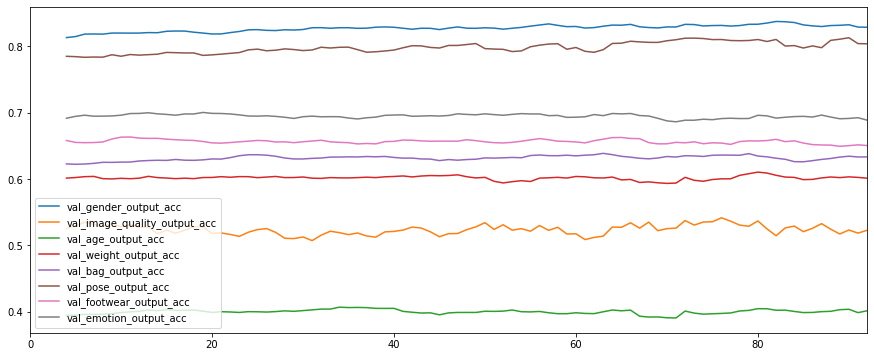

In [78]:
plot_moving_average(df_array[0], 'acc',5)

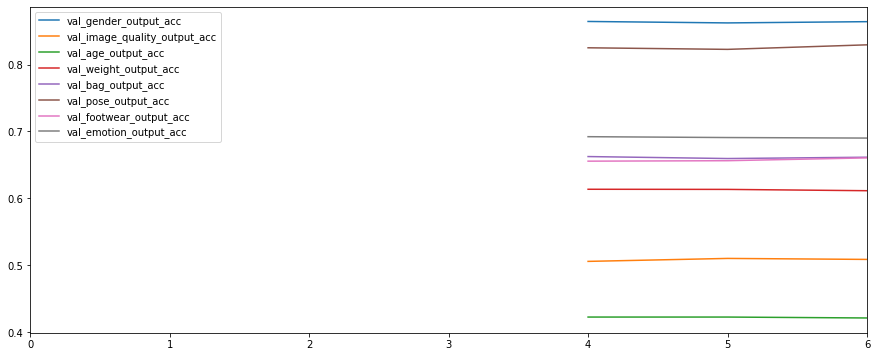

In [79]:
plot_moving_average(df_array_wide[0], 'acc',5)

In [0]:
plot_moving_average(df_array[0], 'output_loss',5)

In [0]:
plot_moving_average(df_array[1], 'output_loss',5)

In [0]:
show_table(df_array[0],'loss')
show_table(df_array[0],'acc')

In [25]:
out_arr=delta_between_two_dfs(df_array[2],df_array[3])
out_arr.sum()*100.0

[ 0.001  -0.0074 -0.001  -0.005   0.001  -0.0134  0.0005 -0.001 ]


-2.5300000000000002

In [0]:
def print_min_loss(df_plot):
    #df_plot = df_array[1]
    min_idx_val = df_plot['val_loss'].idxmin()
    prog_acc= re.compile("^val.*acc$|val_loss|lr")
    val_acc = np.array([column_name for column_name in df_plot.columns if prog_acc.match(column_name) != None])
    return df_plot.iloc[min_idx_val:min_idx_val+1][val_acc].T

In [110]:
#print_min_loss(df_array_wide[0])
print_min_loss(df_array[0])
print_min_loss(df_array_wide[0])

,15
val_loss,13.505158
val_gender_output_acc,0.885827
val_image_quality_output_acc,0.553642
val_age_output_acc,0.435039
val_weight_output_acc,0.621063
val_bag_output_acc,0.685531
val_pose_output_acc,0.852362
val_footwear_output_acc,0.671260
val_emotion_output_acc,0.682087
lr,0.000251


In [133]:
df_plot = df_array[0]
min_idx_val = df_plot['val_loss'].idxmin()
prog_acc= re.compile("^val.*acc$|val_loss")
val_acc = np.array([column_name for column_name in df_plot.columns if prog_acc.match(column_name) != None])
arr1 = df_plot.iloc[min_idx_val:min_idx_val+1][val_acc].T


df_plot = df_array[1]
min_idx_val = df_plot['val_loss'].idxmin()
prog_acc= re.compile("^val.*acc$|val_loss")
val_acc = np.array([column_name for column_name in df_plot.columns if prog_acc.match(column_name) != None])
arr2 = df_plot.iloc[min_idx_val:min_idx_val+1][val_acc].T
final_val=np.round(100.0*(arr1.iloc[1:,:1].values-arr2.iloc[1:,:1].values),4)
final_val.reshape(final_val.shape[0],)


,8
val_loss,26.262089
val_gender_output_acc,0.804563
val_image_quality_output_acc,0.572917
val_age_output_acc,0.402778
val_weight_output_acc,0.617063
val_bag_output_acc,0.624008
val_pose_output_acc,0.776786
val_footwear_output_acc,0.658730
val_emotion_output_acc,0.705357


array([ 1.1905, -0.5456, -0.0992, -0.6448, -0.6944,  1.9841, -1.3889,
       -0.8929])

In [42]:
describe_min_val_loss(df_array[2])
describe_min_val_loss(df_array[3])

         val_loss    val_gender_output_acc    val_image_quality_output_acc    val_age_output_acc    val_weight_output_acc    val_bag_output_acc    val_pose_output_acc    val_footwear_output_acc    val_emotion_output_acc
-----  ----------  -----------------------  ------------------------------  --------------------  -----------------------  --------------------  ---------------------  -------------------------  ------------------------
count    23                     23                              23                    23                       23                    23                     23                         23                        23
mean     22.3351                 0.77726                         0.54136               0.389614                 0.60585               0.619929               0.768358                   0.631184                  0.690153
std       0.58716                0.0280876                       0.0200773             0.0162452                0.0198726        

In [0]:
for col_str in df_array[0].columns.values:
    print(df_array[0][col_str].max()

In [0]:
df_array[1].iloc[df_array[1]['val_loss'].idxmin():]

,val_loss,val_gender_output_loss,val_image_quality_output_loss,...,footwear_output_weighted_acc,emotion_output_weighted_acc,lr
84,151.77089,0.578001,0.952574,...,0.618588,0.712852,0.000399


[Text(0, 0.5, 'val_loss'), Text(0.5, 0, 'epoch')]

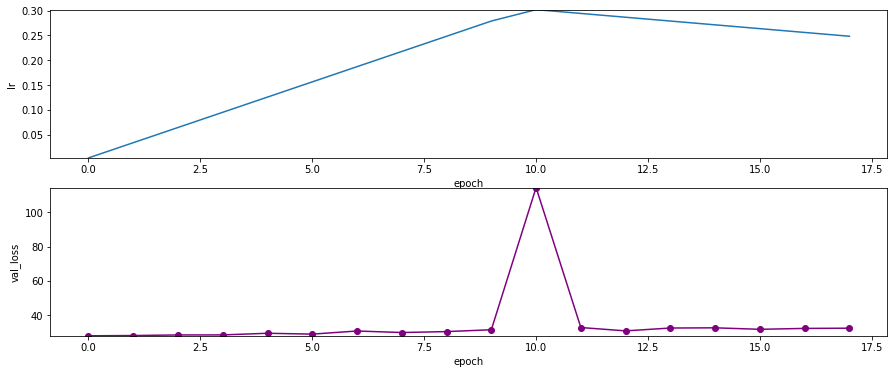

In [0]:
df_to_plot=df_array[0]
fig, ax = plt.subplots(2,figsize=(15, 6))
ax[0].plot(df_to_plot.index.values,df_to_plot['lr'].values)
ax[0].set_ylim(df_to_plot['lr'].min(), df_to_plot['lr'].max())
ax[0].set(xlabel="epoch", ylabel="lr")
ax[1].plot(df_to_plot.index.values,df_to_plot['val_loss'].values,  '-o',color='purple')
ax[1].set_ylim(df_to_plot['val_loss'].min(), df_to_plot['val_loss'].max())
ax[1].set(xlabel="epoch", ylabel="val_loss")